In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

%matplotlib inline
np.random.seed(1)

## 1 - Load Data and Split the Data into Train/Test Sets

We'll be using the [Happy House dataset](https://www.kaggle.com/datasets/iarunava/happy-house-dataset) in this notebook, which contains images of peoples' faces. The task is to build a `ConvNet` that determines whether the people in the images are smiling or not.

In [2]:
def load_happy_dataset():
    train_dataset = h5py.File('data/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])   # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])   # train set labels

    test_dataset = h5py.File('data/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])      # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])      # test set labels

    classes = np.array(test_dataset["list_classes"][:])            # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


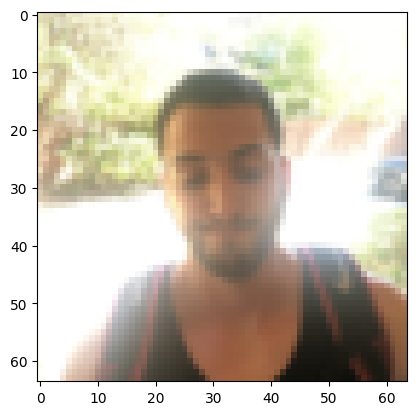

In [6]:
index = 124
plt.imshow(X_train_orig[index])  # display sample training image
plt.show()

## 2 - The Sequential API

We'll create a model using TF Keras' Sequential API, which allows us to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As we'll see, using the **<u>Sequential API</u>** is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook we'll spend some time building with a more flexible, powerful alternative: the **<u>Functional API</u>.**

### 2.1 - Create the Sequential Model

The TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order. We can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method.

For any layer construction in Keras, we'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor.

In [7]:
def happyModel():
    """Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
        
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process).
    
    -------------------
    MODEL ARCHITECTURE:
        * Zero Padding with padding 3, input shape of 64 x 64 x 3
        * Convolution layer with 32 7x7 filters and stride of 1
        * Batch Normalization on axis 3
        * ReLU activation
        * Max Pooling layer
        * Flattening
        * Dense Layer with 1 output unit and sigmoid activation
    """
    
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=3, input_shape=(64, 64, 3)),
        tfl.Conv2D(filters=32, kernel_size=7, strides=1),
        tfl.BatchNormalization(axis=3),
        tfl.ReLU(),
        tfl.MaxPooling2D(),
        tfl.Flatten(),
        tfl.Dense(units=1, activation='sigmoid'),
    ])
    
    return model

In [9]:
happy_model = happyModel()

In [10]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                      

In [11]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [12]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 25ms/step - loss: 1.9522 - accuracy: 0.6317
Epoch 2/10
38/38 [==============================] - 1s 23ms/step - loss: 0.4139 - accuracy: 0.8417
Epoch 3/10
38/38 [==============================] - 1s 24ms/step - loss: 0.1952 - accuracy: 0.9150
Epoch 4/10
38/38 [==============================] - 1s 25ms/step - loss: 0.1279 - accuracy: 0.9450
Epoch 5/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0918 - accuracy: 0.9633
Epoch 6/10
38/38 [==============================] - 1s 25ms/step - loss: 0.0998 - accuracy: 0.9617
Epoch 7/10
38/38 [==============================] - 1s 25ms/step - loss: 0.1684 - accuracy: 0.9283
Epoch 8/10
38/38 [==============================] - 1s 24ms/step - loss: 0.2693 - accuracy: 0.9017
Epoch 9/10
38/38 [==============================] - 1s 24ms/step - loss: 0.1016 - accuracy: 0.9600
Epoch 10/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0992 - accuracy: 0.9567


In [13]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 13ms/step - loss: 0.1243 - accuracy: 0.9467


[0.12427429109811783, 0.9466666579246521]

In [38]:
# let's predict on a new image

from tensorflow.keras.preprocessing import image

def load_and_prepare_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    
    plt.imshow(img_array)
    plt.show()
    
    # add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

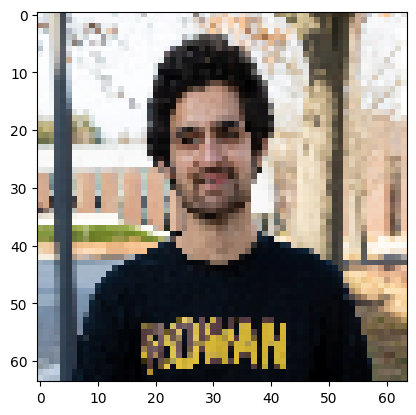

In [39]:
# Izhar is actually smiling in the picture (forshadowing)
image_path = 'data/izhar.png'
izhar_image = load_and_prepare_image(image_path)

In [21]:
prediction = happy_model.predict(izhar_image)

if prediction[0][0] > 0.5:
    print("Happy face detected!")
else:
    print("Not a happy face.")

1/1 [==============================] - 0s 80ms/step
Happy face detected!


## 3 - The Functional API
We'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits. 

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one. 

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network.

<img src="media/seq_vs_func.png" style="width:350px;">

### 3.1 - Load the SIGNS Dataset

The [SIGNS dataset](https://www.kaggle.com/datasets/maneesh99/signs-detection-dataset) is a collection of 6 signs representing numbers from 0 to 5.

In [22]:
def load_signs_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])    # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])    # train set labels

    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])       # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])       # test set labels

    classes = np.array(test_dataset["list_classes"][:])             # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [23]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<img src="media/SIGNS.png" style="width:800px;">

y = 4


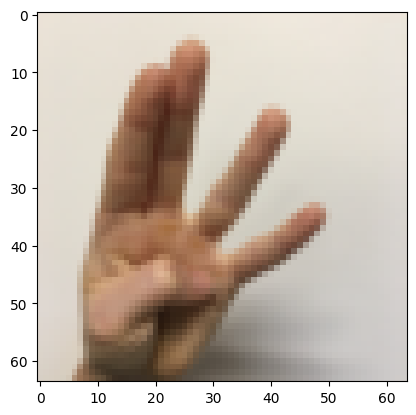

In [24]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [25]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [26]:
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### 3.2 - Forward Propagation

Begin building a graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):** 

Then, create a new node in the graph of layers by calling a layer on the `input_img` object: 

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples the input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, we usually operate on a single example at a time and a single channel at a time. Read [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). Read [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.  

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.
    
    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  Read [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. Read [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In the last function above (`tf.keras.layers.Dense()`), the fully connected layer automatically initializes weights in the graph and keeps on training them as we train the model. Hence, we did not need to initialize those weights when initializing the parameters.

Lastly, before creating the model, we'll need to define the output using the last of the function's compositions (in this example, a Dense layer): 

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**

In [27]:
def convolutional_model(input_shape):
    """Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
        
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 

    -------------------
    MODEL ARCHITECTURE:
        * CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
        * ReLU
        * MAXPOOL: window 8x8, stride 8, padding 'SAME'
        
        * CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
        * ReLU
        * MAXPOOL: window 4x4, stride 4, padding 'SAME'
        
        * FLATTEN
        * Dense Layer (6 output neurons with softmax)
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters=8, kernel_size=4, padding='SAME')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPooling2D(pool_size=(8, 8), strides=8, padding='SAME')(A1)

    Z2 = tfl.Conv2D(filters=16, kernel_size=2, padding='SAME')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPooling2D(pool_size=(4, 4), strides=4, padding='SAME')(A2)
    
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6, activation="softmax")(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [28]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

In [30]:
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset, verbose=0)

In [31]:
history.history

{'loss': [1.8147211074829102,
  1.789671778678894,
  1.7846516370773315,
  1.7805933952331543,
  1.7769083976745605,
  1.7725597620010376,
  1.76730215549469,
  1.760392189025879,
  1.7519018650054932,
  1.7412971258163452,
  1.7285187244415283,
  1.7127206325531006,
  1.6918550729751587,
  1.66580331325531,
  1.6353174448013306,
  1.5977866649627686,
  1.558398962020874,
  1.5224937200546265,
  1.4812568426132202,
  1.4469587802886963,
  1.4094620943069458,
  1.3726166486740112,
  1.3373210430145264,
  1.300590991973877,
  1.2713000774383545,
  1.2455179691314697,
  1.2194443941116333,
  1.192753791809082,
  1.167678713798523,
  1.1450551748275757,
  1.1229324340820312,
  1.102942943572998,
  1.082645058631897,
  1.0640301704406738,
  1.045249581336975,
  1.0266189575195312,
  1.0081127882003784,
  0.9928673505783081,
  0.9762894511222839,
  0.9608367085456848,
  0.9437295198440552,
  0.9303188920021057,
  0.9152828454971313,
  0.9024571776390076,
  0.8877279162406921,
  0.87547045946

C:\Users\izhar\AppData\Local\Temp\ipykernel_8760\811792313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)
C:\Users\izhar\AppData\Local\Temp\ipykernel_8760\811792313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)


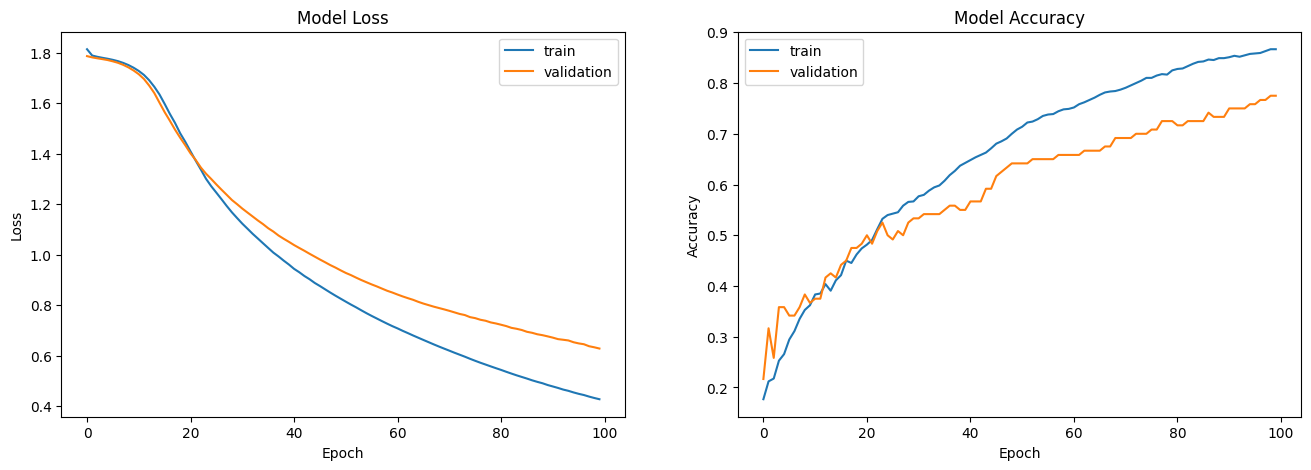

In [34]:
df_loss_acc = pd.DataFrame(history.history)

# Prepare loss DataFrame
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)

# Prepare accuracy DataFrame
df_acc = df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot loss
df_loss.plot(ax=axes[0], title='Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

# Plot accuracy
df_acc.plot(ax=axes[1], title='Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

# Show the plot
plt.show()